# Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [7]:
df.describe

<bound method NDFrame.describe of      Country  Year  Life expectancy at birth (years)           GDP
0      Chile  2000                              77.3  7.786093e+10
1      Chile  2001                              77.3  7.097992e+10
2      Chile  2002                              77.8  6.973681e+10
3      Chile  2003                              77.9  7.564346e+10
4      Chile  2004                              78.0  9.921039e+10
..       ...   ...                               ...           ...
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10

[96 rows x 4 columns]>

How many countries do we have on our table?

In [9]:
df['Country'].value_counts()

Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64

What years do we have information?

In [10]:
df['Year'].value_counts()

2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: Year, dtype: int64

In [11]:
df = df.rename({'Life expectancy at birth (years)': 'LEB'}, axis = "columns" )
df.head()

,Country,Year,LEB,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Let's build a distribution histogram GDP.

Text(0.5, 1.0, 'GDP in Trillions dollars USA')

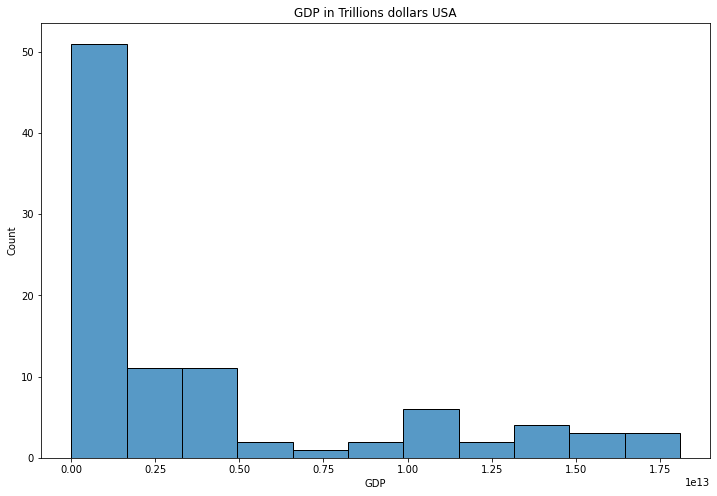

In [17]:
plt.figure(figsize = (12,8))
sns.histplot(data = df, x = 'GDP')
plt.title('GDP in Trillions dollars USA')

<AxesSubplot:xlabel='GDP', ylabel='Density'>

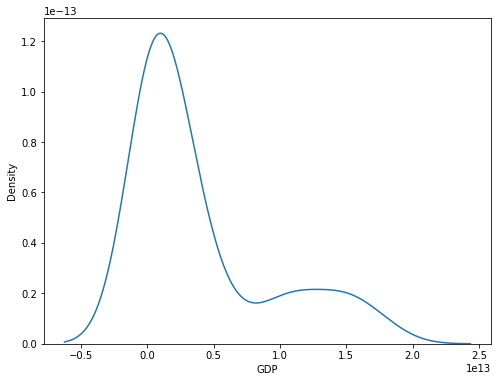

In [18]:
plt.figure(figsize=(8,6))
sns.kdeplot(df['GDP'])

We see that GDP distribution has right skewed.

Text(0.5, 1.0, 'Life expectancy at birth (years)')

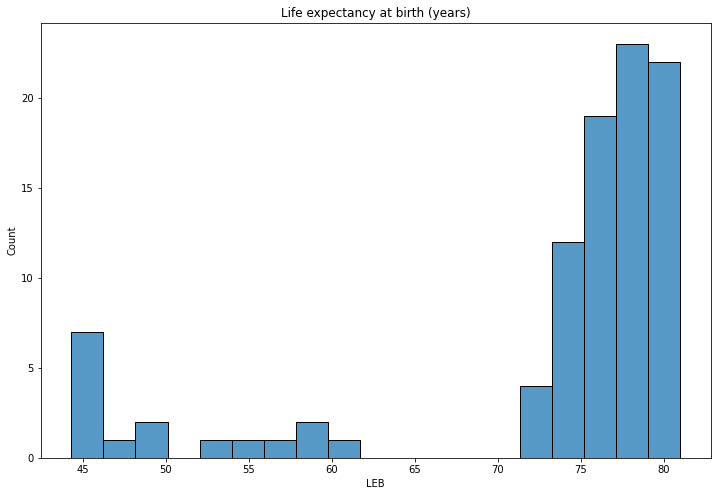

In [20]:
plt.figure(figsize = (12,8))
sns.histplot(data = df, x = 'LEB')
plt.title('Life expectancy at birth (years)')

<AxesSubplot:xlabel='LEB', ylabel='Density'>

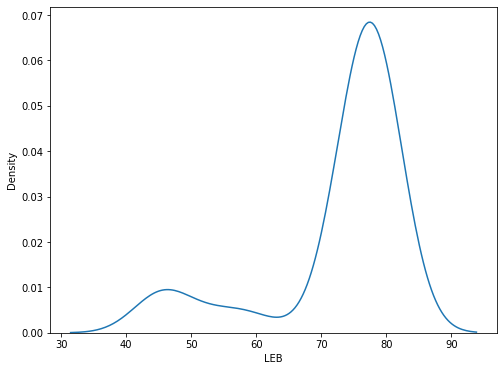

In [21]:
plt.figure(figsize=(8,6))
sns.kdeplot(df['LEB'])

We see that the distribution of life expectancy, has left skewed. Obviously, the higher the GDP, the higher the life expectancy.

In [22]:
df['GDP_billions'] = df['GDP']/(10**9)
df.head()

,Country,Year,LEB,GDP,GDP_billions
0,Chile,2000,77.3,7.786093e+10,77.860932
1,Chile,2001,77.3,7.097992e+10,70.979924
2,Chile,2002,77.8,6.973681e+10,69.736811
3,Chile,2003,77.9,7.564346e+10,75.643460
4,Chile,2004,78.0,9.921039e+10,99.210393


Let's build a scatterplot GDP_billins and LEB.

Text(0.5, 1.0, 'GDP & Life expectancy.')

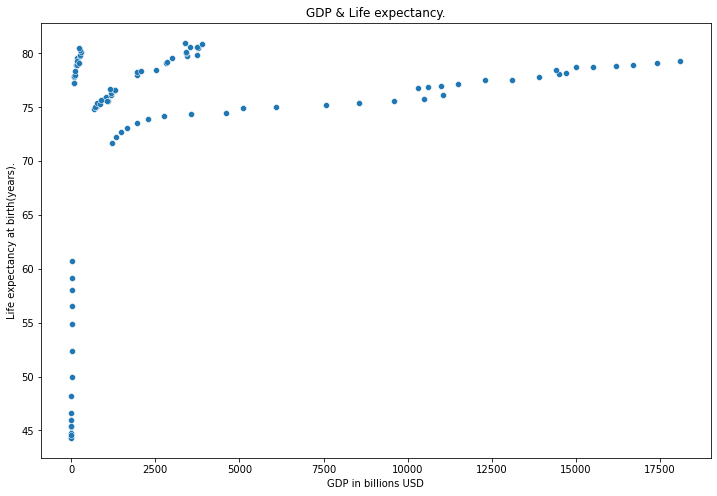

In [23]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = df, x = 'GDP_billions', y = "LEB")
plt.ylabel('Life expectancy at birth(years).')
plt.xlabel('GDP in billions USD')
plt.title('GDP & Life expectancy.')

On the graph, we see four groups of points. Let's take a look at the properties of these groups.

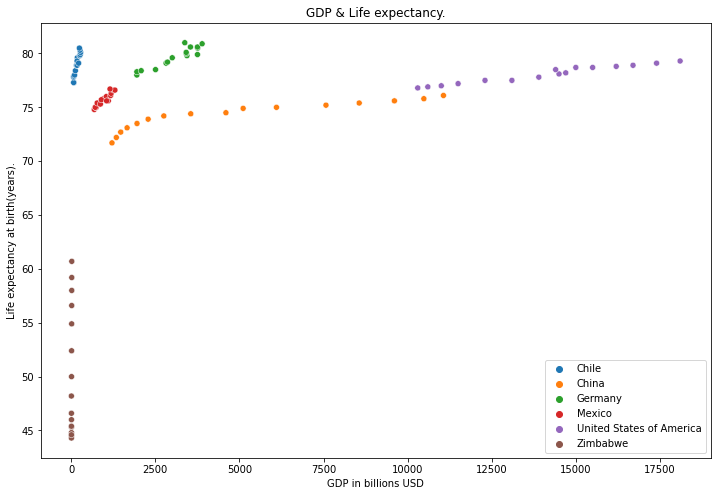

In [24]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = df, x = 'GDP_billions', y = "LEB", hue = 'Country')
plt.ylabel('Life expectancy at birth(years).')
plt.xlabel('GDP in billions USD')
plt.title('GDP & Life expectancy.')
plt.legend()

Indeed, the groups are distributed by country. Let's define the main statistics for different countries and by year.

Let's build a boxplots GDP and Country.

<AxesSubplot:xlabel='Country', ylabel='GDP'>

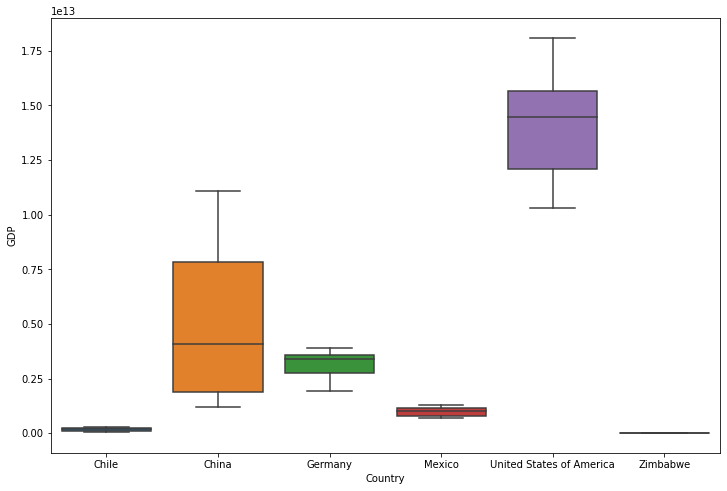

In [26]:
plt.figure(figsize = (12,8))
sns.boxplot(data=df, x= 'Country', y = 'GDP')
plt.title('GDP in Trillions dollars USA')

Let's build a boxplots life expectations and Country.

Text(0.5, 1.0, 'Life expectancy')

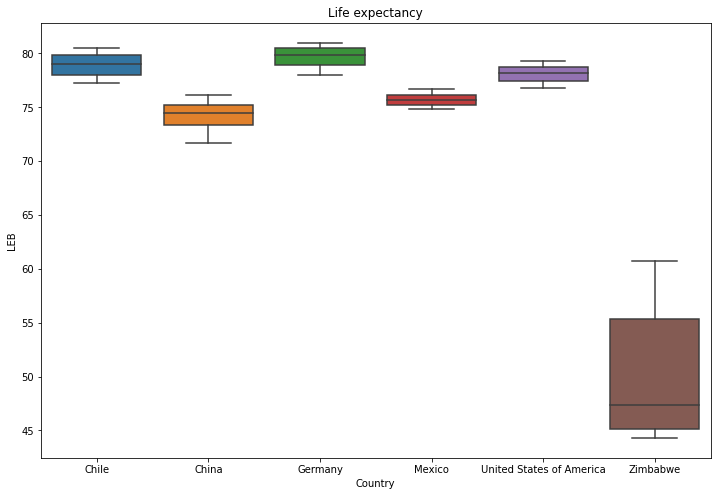

In [41]:
plt.figure(figsize = (12,8))
sns.boxplot(data=df, x= 'Country', y = 'LEB')
plt.title('Life expectancy')

The main statistics for all countries.

In [29]:
means = df.groupby('Country').GDP.mean()
means.head()

Country
Chile                       1.697888e+11
China                       4.957714e+12
Germany                     3.094776e+12
Mexico                      9.766506e+11
United States of America    1.407500e+13
Name: GDP, dtype: float64

In [39]:
#Max life expectations in countries
max_years = df.groupby('Country').LEB.max()
max_years

Country
Chile                       80.5
China                       76.1
Germany                     81.0
Mexico                      76.7
United States of America    79.3
Zimbabwe                    60.7
Name: LEB, dtype: float64

In [40]:
min_years = df.groupby('Country').LEB.min()
min_years

Country
Chile                       77.3
China                       71.7
Germany                     78.0
Mexico                      74.8
United States of America    76.8
Zimbabwe                    44.3
Name: LEB, dtype: float64

Text(0.5, 1.0, 'GDP in Trillions dollars USA')

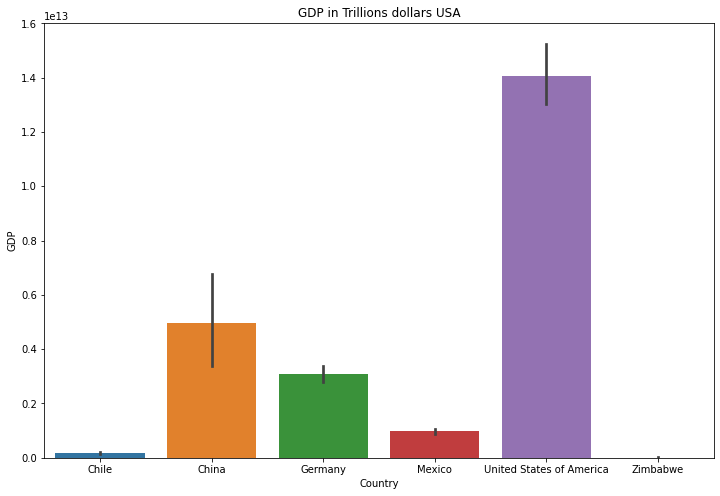

In [36]:
plt.figure(figsize=(12,8))
sns.barplot(data = df, x= 'Country', y = 'GDP')
plt.title("GDP in Trillions dollars USA")

Text(0.5, 1.0, 'Life expectancy at birth (years)')

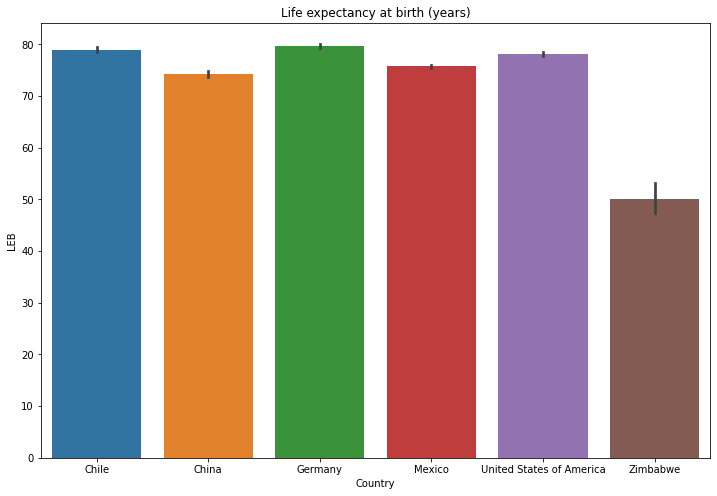

In [37]:
plt.figure(figsize=(12,8))
sns.barplot(data = df, x= 'Country', y = 'LEB')
plt.title('Life expectancy at birth (years)')